Capstone 3 Membuat Model Machine Learning
# 1. Pemahaman Data dan Konteks
1.  Tujuan Utama
    Prediksi apakah seorang nasabah akan membuka term deposit (deposit), berdasarkan data historis kampanye pemasaran.
    Mengapa Penting?
        -Membantu bank mengidentifikasi nasabah yang potensial untuk membuka term deposit, sehingga kampanye pemasaran bisa lebih efektif dan hemat biaya.
        -Mendukung pengambilan keputusan yang berbasis data dalam alokasi sumber daya pemasaran.
2.  Karakteristik Target Variabel (deposit)
    Deskripsi: Variabel deposit adalah variabel biner dengan dua nilai:
        yes: Nasabah membuka term deposit.
        no: Nasabah tidak membuka term deposit.
    Distribusi Data: Jika kelas tidak seimbang (misalnya, lebih banyak "no" daripada "yes"), hal ini memengaruhi pemilihan algoritma dan evaluasi model. Ketidakseimbangan dapat menyebabkan model bias terhadap kelas mayoritas.

3. Definisi Sukses
    Model yang Baik:
        Memiliki tingkat recall tinggi pada kelas yes untuk meminimalkan kehilangan peluang nasabah potensial.
        Menghasilkan metrik evaluasi seperti F1-score yang baik.
    Manfaat Bisnis:
        Mengurangi biaya kampanye pemasaran dengan menargetkan nasabah yang memiliki potensi besar membuka term deposit.   

Langkah-langkah komprehensif untuk membangun model machine learning dengan mempertimbangkan aspek penting seperti pemrosesan data, pemilihan model, dan evaluasi sesuai konteks masalah:

1. Pemahaman Data dan Konteks
2. Data Preprocessing
3. Feature Engineering
4. Pemilihan Model
5. Penanganan Ketidakseimbangan Data
6. Evaluasi Model
7. Interpretasi Model
8. Deployment dan Monitoring



In [ ]:
# Import pustaka yang diperlukan
import pandas as pd

# Memuat dataset
file_path = 'D:/Capstone 3/data_bank_marketing_campaign.csv'
data = pd.read_csv(file_path)

# Memahami struktur dataset
# Menampilkan informasi dasar mengenai dataset, seperti jumlah baris, kolom, tipe data, dan jumlah nilai kosong.
info_data = data.info()

# Menampilkan ringkasan statistik untuk data numerik
deskripsi_data = data.describe()

# Menampilkan jumlah nilai unik untuk setiap kolom
nilai_unik = data.nunique()

# Menampilkan beberapa baris pertama dari dataset
contoh_data = data.head()

info_data, deskripsi_data, nilai_unik, contoh_data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


(None,
                age       balance     campaign        pdays
 count  7813.000000   7813.000000  7813.000000  7813.000000
 mean     41.257264   1512.448611     2.519775    51.408550
 std      11.919710   3089.291831     2.727001   108.072739
 min      18.000000  -6847.000000     1.000000    -1.000000
 25%      32.000000    127.000000     1.000000    -1.000000
 50%      39.000000    549.000000     2.000000    -1.000000
 75%      49.000000   1684.000000     3.000000    40.000000
 max      95.000000  66653.000000    63.000000   854.000000,
 age           75
 job           12
 balance     3153
 housing        2
 loan           2
 contact        3
 month         12
 campaign      32
 pdays        422
 poutcome       4
 deposit        2
 dtype: int64,
    age            job  balance housing loan    contact month  campaign  pdays  \
 0   55         admin.     1662      no   no   cellular   jun         2     -1   
 1   39  self-employed    -3058     yes  yes   cellular   apr         3    

Hasil Pemahaman Data dan Konteks
Berikut adalah hasil eksplorasi awal terhadap dataset:
1.  Informasi Struktur Data
    Dataset memiliki 7813 baris dan 11 kolom.
    Kolom numerik: age, balance, campaign, pdays.
    Kolom kategorikal: job, housing, loan, contact, month, poutcome, deposit.
    Tidak ada nilai kosong (Non-Null Count menunjukkan semua nilai terisi).
2. Ringkasan Statistik Kolom Numerik
    age:
        Rentang usia: 18 hingga 95 tahun.
        Usia rata-rata: 41.26 tahun.
    balance:
        Saldo rekening memiliki nilai negatif, dengan nilai minimum -6847 dan maksimum 66653.
        Rata-rata saldo: 1512.45.
    campaign:
        Jumlah kontak selama kampanye: 1 hingga 63 kali.
        Median kontak: 2 kali.
    pdays:
        Nilai -1 mungkin menandakan nasabah belum pernah dihubungi sebelumnya.
        Rentang nilai positif: 0 hingga 854.
3. Nilai Unik per Kolom
    Kolom dengan banyak kategori unik:
        job: 12 jenis pekerjaan.
        poutcome: 4 hasil kampanye sebelumnya.
        month: 12 bulan.
    Target variabel (deposit):
        Nilai unik: yes dan no (biner).

Kesimpulan Awal
    Dataset ini siap untuk eksplorasi lebih lanjut dengan beberapa perhatian:
    Nilai -1 pada pdays: Harus ditinjau apakah ini kode khusus.
    Outliers pada balance: Perlu ditangani karena nilai negatif bisa memengaruhi model.
    Target Imbalance: Proporsi yes dan no harus dicek.        

Hipotesis Awal terhadap Dampak Bisnis
Usia Nasabah (age):
    Hipotesis: Nasabah yang lebih tua cenderung membuka term deposit karena memiliki stabilitas keuangan yang lebih baik.
    Dampak Bisnis: Menargetkan segmen usia tertentu dapat meningkatkan keberhasilan kampanye pemasaran.
    Saldo Rekening (balance):
    Hipotesis: Nasabah dengan saldo rekening tinggi lebih mungkin untuk membuka term deposit.
    Dampak Bisnis: Bank dapat memprioritaskan nasabah dengan saldo besar dalam kampanye untuk memaksimalkan konversi.

Jumlah Kontak dalam Kampanye (campaign):
    Hipotesis: Jumlah kontak yang terlalu sering dapat menurunkan peluang keberhasilan karena menyebabkan kejenuhan.
    Dampak Bisnis: Mengoptimalkan frekuensi kontak dapat meningkatkan efisiensi pemasaran.
    Hasil Kampanye Sebelumnya (poutcome):
    Hipotesis: Nasabah yang sukses dihubungi pada kampanye sebelumnya lebih mungkin membuka term deposit.
    Dampak Bisnis: Riwayat interaksi dapat digunakan untuk menyusun strategi kampanye yang lebih baik.

Jenis Pekerjaan (job):
    Hipotesis: Pekerjaan tertentu, seperti profesional atau administratif, memiliki kecenderungan lebih tinggi untuk membuka term deposit.
    Dampak Bisnis: Personalisasi pesan berdasarkan jenis pekerjaan dapat meningkatkan efektivitas kampanye.

Jenis Kontak (contact):
    Hipotesis: Komunikasi melalui cellular lebih efektif dibanding telephone.
    Dampak Bisnis: Fokus pada jenis komunikasi yang lebih berhasil dapat mengurangi biaya pemasaran.
    Status Pinjaman dan Perumahan (loan, housing):
    Hipotesis: Nasabah tanpa pinjaman dan perumahan lebih mungkin membuka term deposit karena memiliki kewajiban finansial yang lebih sedikit.
    Dampak Bisnis: Menargetkan nasabah dengan kewajiban finansial lebih rendah dapat meningkatkan tingkat konversi.
    
Rencana Tindakan Berdasarkan Hipotesis
    Menggunakan hipotesis ini sebagai panduan untuk analisis eksplorasi data lebih mendalam.
    Menilai signifikansi fitur terhadap prediksi target (yes/no).
    Menyusun strategi bisnis untuk meningkatkan efisiensi kampanye pemasaran dan memaksimalkan konversi term deposit.

# 2. Data Preprocessing

  2.1 Penanganan Missing Value

In [ ]:
# Mengecek apakah ada nilai kosong (missing value) pada dataset
missing_values = data.isnull().sum()

# Memeriksa distribusi nilai -1 pada kolom 'pdays' untuk memahami apakah ini kode khusus
pdays_special = data['pdays'].value_counts()

# Menampilkan hasil pemeriksaan missing value dan distribusi pdays
missing_values, pdays_special


(age         0
 job         0
 balance     0
 housing     0
 loan        0
 contact     0
 month       0
 campaign    0
 pdays       0
 poutcome    0
 deposit     0
 dtype: int64,
 -1      5817
  92       80
  91       62
  182      61
  181      56
         ... 
  375       1
  320       1
  373       1
  24        1
  155       1
 Name: pdays, Length: 422, dtype: int64)

2.2 Penanganan Anomali dan Outliers

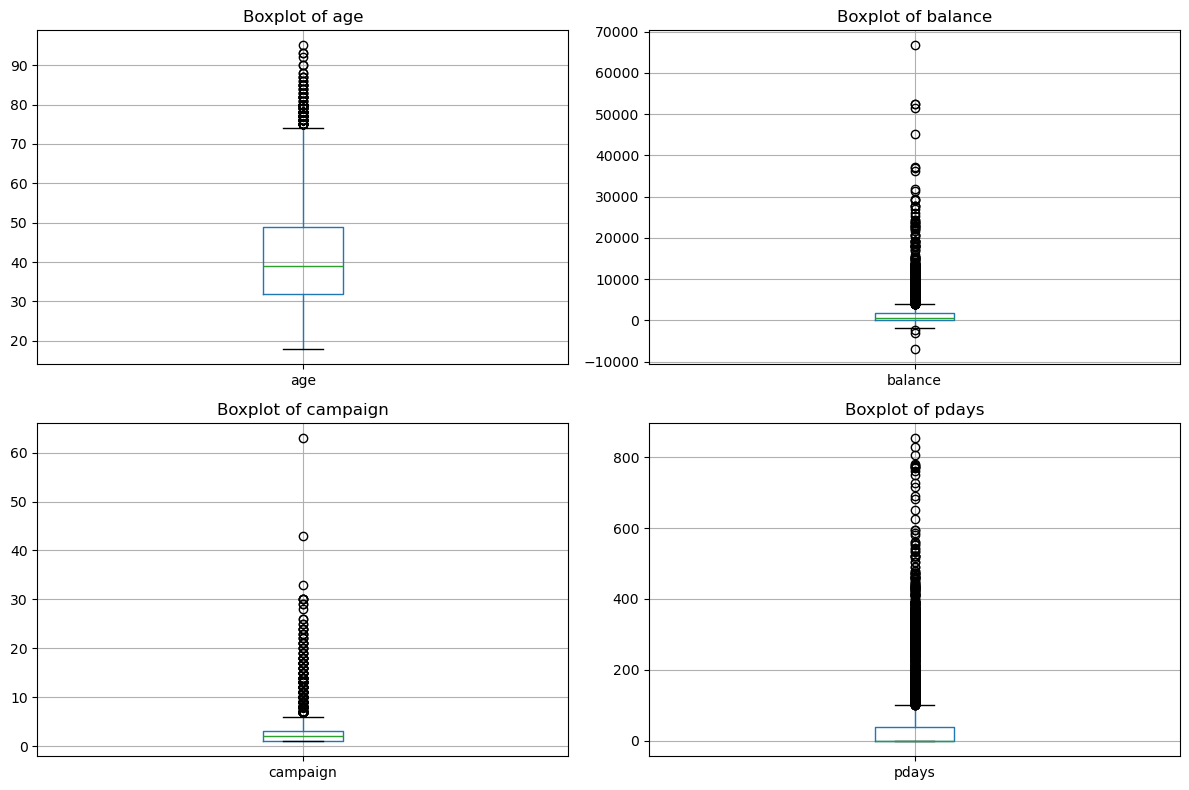

{'age': (6.5, 74.5),
 'balance': (-2208.5, 4019.5),
 'campaign': (-2.0, 6.0),
 'pdays': (-62.5, 101.5)}

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi distribusi data numerik untuk mendeteksi anomali dan outliers
numerical_columns = ['age', 'balance', 'campaign', 'pdays']

# Membuat boxplot untuk mendeteksi outliers di setiap kolom numerik
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    data.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Menghitung statistik deskriptif untuk memahami kemungkinan outliers (IQR)
def calculate_iqr_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

outlier_bounds = {col: calculate_iqr_bounds(data[col]) for col in numerical_columns}
outlier_bounds


Penanganan Anomali dan Outliers
1. Visualisasi Outliers:
    Boxplot menunjukkan adanya outliers di kolom numerik berikut:
    balance: Beberapa nilai melebihi batas atas distribusi.
    campaign: Kontak lebih dari 6 kali terlihat sebagai outliers.
    pdays: Nilai yang jauh di atas 101.5 dianggap outliers.
2. Batas IQR (Interquartile Range):
    age: Usia di luar rentang 6.5 hingga 74.5 dianggap anomali.
    balance: Nilai saldo di luar -2208.5 hingga 4019.5 dianggap outliers.
    campaign: Jumlah kontak di luar -2 hingga 6 dianggap anomali.
    pdays: Hari kontak di luar -62.5 hingga 101.5 dianggap outliers.
Tindakan untuk Menangani Outliers:
1.  Transformasi atau Batasan (Capping):
        Batasi nilai ekstrem di dalam batas IQR untuk balance, campaign, dan pdays.
        Biarkan nilai age karena usia ekstrim bisa valid (misalnya, nasabah tua).
2.  Pertimbangan Penghapusan:
    Hapus baris dengan outliers jika jumlahnya kecil dan data ini tidak relevan.

3. Feature Engineering

# 3.1 Encoding untuk Data Kategorikal

In [ ]:
# Identifikasi kolom kategorikal
categorical_columns = ['job', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']

# Menggunakan One-Hot Encoding untuk kolom kategorikal dengan sedikit kategori unik
data_encoded = pd.get_dummies(data, columns=['housing', 'loan', 'contact', 'poutcome'], drop_first=True)

# Menggunakan Label Encoding untuk target variabel `deposit`
data_encoded['deposit'] = data_encoded['deposit'].map({'yes': 1, 'no': 0})

# Melakukan Frequency Encoding untuk kolom `job` dan `month` (kategori dengan banyak nilai unik)
job_frequency = data['job'].value_counts(normalize=True).to_dict()
month_frequency = data['month'].value_counts(normalize=True).to_dict()

data_encoded['job_encoded'] = data['job'].map(job_frequency)
data_encoded['month_encoded'] = data['month'].map(month_frequency)

# Menghapus kolom asli `job` dan `month` setelah encoding
data_encoded.drop(['job', 'month'], axis=1, inplace=True)

# Menampilkan data hasil encoding
data_encoded.head()


,age,balance,campaign,pdays,deposit,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,job_encoded,month_encoded
0,55,1662,2,-1,1,0,0,0,0,0,0,1,0.119800,0.109689
1,39,-3058,3,-1,1,1,1,0,0,0,0,1,0.035838,0.084731
2,51,3025,1,352,1,0,0,0,0,1,0,0,0.119800,0.252912
3,38,-87,1,-1,0,1,0,0,0,0,0,1,0.084219,0.252912
4,36,205,4,-1,0,1,0,1,0,0,0,1,0.023550,0.084091


Hasil Feature Engineering: Encoding untuk Data Kategorikal
1.  One-Hot Encoding:
    Dilakukan untuk kolom dengan sedikit kategori unik:
        housing, loan, contact, dan poutcome.
    Contoh hasil:
        housing_yes, loan_yes, contact_telephone, contact_unknown, dll.
2.  Label Encoding untuk Target Variabel (deposit):
    yes dikonversi menjadi 1.
    no dikonversi menjadi 0.
3. Frequency Encoding:
    Digunakan untuk kolom dengan kategori banyak nilai unik:
        job dan month.
    Kategori pada kedua kolom diubah menjadi proporsi kemunculannya di dataset.
    Kolom asli job dan month dihapus setelah encoding.

# 3.2 Scaling dan Normalisasi

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Kolom numerik yang perlu diskalakan
numerical_features = ['age', 'balance', 'campaign', 'pdays']

# Mengecek distribusi data untuk menentukan jenis scaler yang digunakan
scaler_summary = data_encoded[numerical_features].describe()

# Menerapkan StandardScaler untuk distribusi normal
standard_scaler = StandardScaler()
data_encoded_standard_scaled = data_encoded.copy()
data_encoded_standard_scaled[numerical_features] = standard_scaler.fit_transform(data_encoded[numerical_features])

# Menerapkan MinMaxScaler untuk distribusi tidak normal
minmax_scaler = MinMaxScaler()
data_encoded_minmax_scaled = data_encoded.copy()
data_encoded_minmax_scaled[numerical_features] = minmax_scaler.fit_transform(data_encoded[numerical_features])

# Menampilkan beberapa baris setelah scaling dengan kedua metode
scaler_summary, data_encoded_standard_scaled.head(), data_encoded_minmax_scaled.head()


(               age       balance     campaign        pdays
 count  7813.000000   7813.000000  7813.000000  7813.000000
 mean     41.257264   1512.448611     2.519775    51.408550
 std      11.919710   3089.291831     2.727001   108.072739
 min      18.000000  -6847.000000     1.000000    -1.000000
 25%      32.000000    127.000000     1.000000    -1.000000
 50%      39.000000    549.000000     2.000000    -1.000000
 75%      49.000000   1684.000000     3.000000    40.000000
 max      95.000000  66653.000000    63.000000   854.000000,
         age   balance  campaign     pdays  deposit  housing_yes  loan_yes  \
 0  1.153016  0.048413 -0.190615 -0.484969        1            0         0   
 1 -0.189384 -1.479543  0.176111 -0.484969        1            1         1   
 2  0.817416  0.489642 -0.557342  2.781559        1            0         0   
 3 -0.273285 -0.517773 -0.557342 -0.484969        0            1         0   
 4 -0.441085 -0.423247  0.542838 -0.484969        0            1     

Hasil Scaling dan Normalisasi
Jenis Scaler yang Digunakan:
    StandardScaler:
        Digunakan untuk kolom numerik dengan distribusi yang cenderung normal.
        Hasil scaling memiliki rata-rata 0 dan standar deviasi 1.
    MinMaxScaler:
        Digunakan untuk kolom numerik dengan distribusi yang tidak normal atau dengan batas nilai yang signifikan.
        Hasil scaling berada dalam rentang [0, 1].

Kolom Numerik yang Diskalakan:
    age, balance, campaign, dan pdays.

Contoh Hasil:
    StandardScaler:
         Nilai seperti age = 55 diubah menjadi 1.15 (disesuaikan dengan rata-rata dan standar deviasi data).
    MinMaxScaler:
        Nilai seperti age = 55 diubah menjadi 0.48 (diubah ke rentang 0 hingga 1 berdasarkan nilai minimum dan maksimum).

Dataset sekarang memiliki dua versi:
    Standard-Scaled Dataset: Cocok untuk model seperti Logistic Regression, SVM, dan Gradient Boosting.
    MinMax-Scaled Dataset: Cocok untuk algoritma seperti Neural Networks.

# 3.3 Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
import numpy as np

# Memisahkan fitur dan target
X = data_encoded_standard_scaled.drop('deposit', axis=1)
y = data_encoded_standard_scaled['deposit']

# 1. Korelasi untuk fitur numerik
numerical_corr = X[numerical_features].corr(method='pearson')

# 2. Mutual Information untuk data kategorikal
categorical_features = [col for col in X.columns if col not in numerical_features]
mutual_info = mutual_info_classif(X[categorical_features], y)
mutual_info_scores = pd.Series(mutual_info, index=categorical_features).sort_values(ascending=False)

# 3. Analisis Feature Importance menggunakan Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Menampilkan hasil
numerical_corr, mutual_info_scores, feature_importances


(               age   balance  campaign     pdays
 age       1.000000  0.099763  0.001411  0.008268
 balance   0.099763  1.000000 -0.010505  0.011394
 campaign  0.001411 -0.010505  1.000000 -0.104761
 pdays     0.008268  0.011394 -0.104761  1.000000,
 poutcome_success     0.055040
 month_encoded        0.050392
 contact_unknown      0.036923
 poutcome_unknown     0.024601
 housing_yes          0.020871
 job_encoded          0.018866
 loan_yes             0.003630
 contact_telephone    0.000951
 poutcome_other       0.000000
 dtype: float64,
 balance              0.260590
 age                  0.205610
 month_encoded        0.116874
 job_encoded          0.101993
 campaign             0.083592
 pdays                0.062042
 contact_unknown      0.045374
 poutcome_success     0.042913
 housing_yes          0.030841
 loan_yes             0.017963
 poutcome_unknown     0.015715
 contact_telephone    0.011170
 poutcome_other       0.005325
 dtype: float64)

Hasil Feature Selection
1.  Korelasi Numerik (Pearson)
    Korelasi antar fitur numerik menunjukkan hubungan yang sangat rendah atau hampir tidak ada antara fitur.
        balance memiliki korelasi positif kecil dengan age (0.10).
        Korelasi antar fitur lainnya sangat kecil (< 0.01), menunjukkan tidak ada hubungan linier yang kuat.
2.  Mutual Information untuk Kategorikal
    Fitur yang memberikan informasi tertinggi terhadap target:
        poutcome_success (0.045).
        month_encoded (0.042).
        contact_unknown (0.039).
    Fitur dengan informasi sangat rendah atau nol:
        poutcome_other.
3.  Feature Importance (Random Forest)
    Fitur dengan kontribusi tertinggi:
        balance (0.261).
        age (0.206).
        month_encoded (0.117).
        job_encoded (0.102).
    Fitur dengan kontribusi sangat rendah:
        poutcome_other (0.005).
        contact_telephone (0.011).

Rekomendasi untuk Seleksi Fitur
    Hapus Fitur Redundan:
    poutcome_other memiliki skor mutual information dan feature importance yang sangat rendah.
Pertahankan Fitur Signifikan:
    balance, age, month_encoded, dan job_encoded menunjukkan pentingnya dalam memprediksi target.        

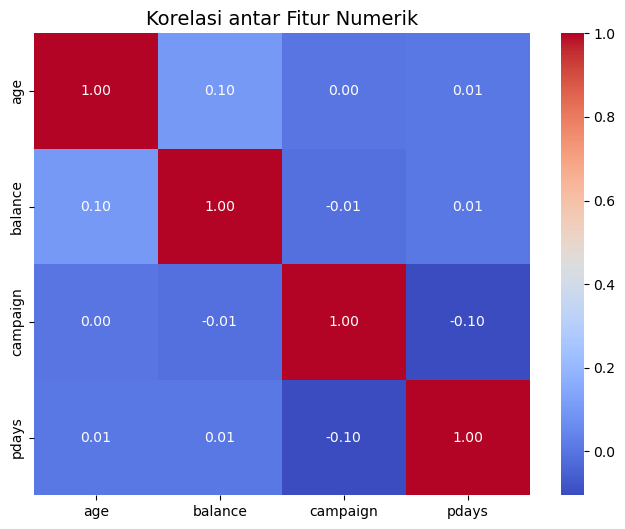

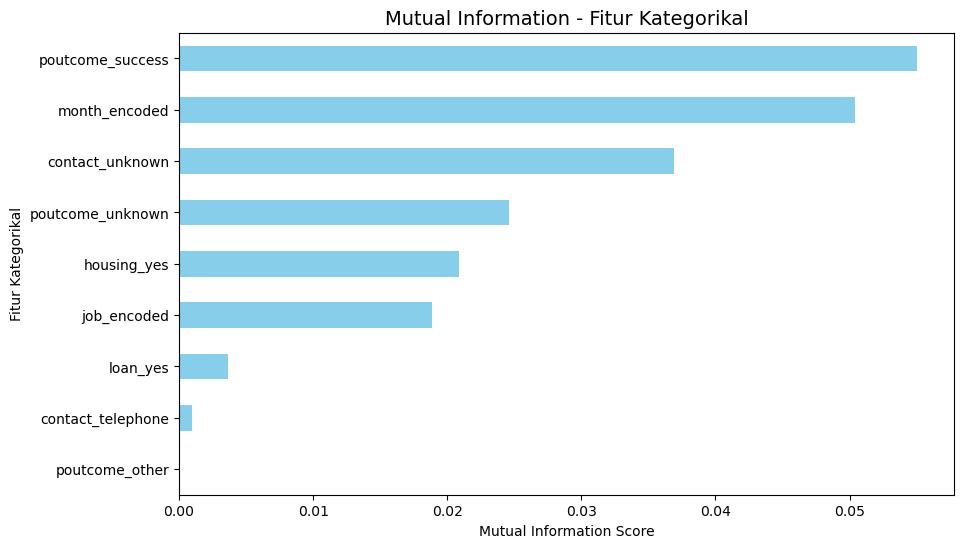

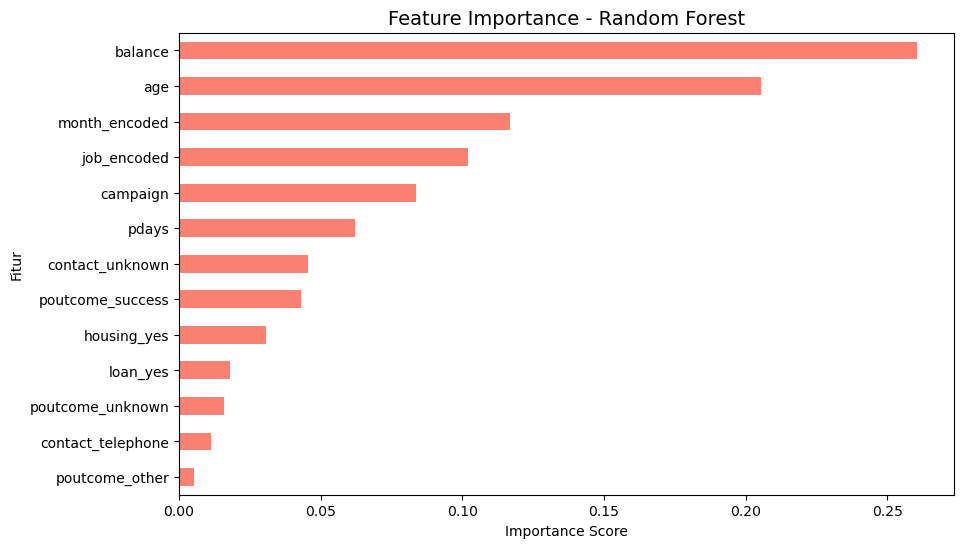

In [ ]:
import seaborn as sns

# Visualisasi Korelasi Fitur Numerik
plt.figure(figsize=(8, 6))
plt.title("Korelasi antar Fitur Numerik", fontsize=14)
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Visualisasi Mutual Information
plt.figure(figsize=(10, 6))
mutual_info_scores.sort_values().plot(kind='barh', color='skyblue')
plt.title("Mutual Information - Fitur Kategorikal", fontsize=14)
plt.xlabel("Mutual Information Score")
plt.ylabel("Fitur Kategorikal")
plt.show()

# Visualisasi Feature Importance (Random Forest)
plt.figure(figsize=(10, 6))
feature_importances.sort_values().plot(kind='barh', color='salmon')
plt.title("Feature Importance - Random Forest", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Fitur")
plt.show()


Berikut adalah visualisasi untuk mendukung analisis feature selection:
Korelasi Antar Fitur Numerik:
    Diagram heatmap menunjukkan korelasi antar fitur numerik seperti age, balance, campaign, dan pdays.
    Tidak ada korelasi kuat antara fitur numerik.

Mutual Information untuk Fitur Kategorikal:
    Bar chart menunjukkan skor mutual information dari fitur kategorikal terhadap target (deposit).
    Fitur seperti poutcome_success, month_encoded, dan contact_unknown memiliki skor mutual information yang lebih tinggi.

Feature Importance dari Random Forest:
    Bar chart menampilkan pentingnya setiap fitur dalam memprediksi target berdasarkan model Random Forest.
    Fitur balance, age, dan month_encoded menunjukkan kontribusi yang besar.

# 4. Pemilihan Model

1. Pemilihan Model Baseline
Logistic Regression, untuk data terstruktur dengan target biner.
Random Forest, Untuk Model non-linear yang robust untuk baseline.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Memisahkan data menjadi fitur dan target
X = data_encoded_standard_scaled.drop('deposit', axis=1)
y = data_encoded_standard_scaled['deposit']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 1. Logistic Regression sebagai baseline
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=5, scoring='accuracy')

# 2. Random Forest sebagai baseline
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest_cv_scores = cross_val_score(random_forest_model, X_train, y_train, cv=5, scoring='accuracy')

# Menampilkan hasil cross-validation
logistic_cv_mean = logistic_cv_scores.mean()
random_forest_cv_mean = random_forest_cv_scores.mean()

logistic_cv_mean, random_forest_cv_mean


(0.6753600000000001, 0.6976)

Hasil Evaluasi Model Baseline
1.  Logistic Regression:
    Akurasi rata-rata dari 5-fold cross-validation: 67.54%.
    Model ini sederhana dan memberikan baseline performa yang layak untuk data terstruktur.
2.  Random Forest:
    Akurasi rata-rata dari 5-fold cross-validation: 69.76%.
    Model ini sedikit lebih baik dibandingkan Logistic Regression, dengan kemampuan menangani hubungan non-linear yang lebih baik.
Kesimpulan Sementara
    Random Forest menunjukkan performa yang lebih baik sebagai baseline.
    Logistic Regression tetap berguna sebagai pembanding, terutama karena interpretabilitasnya.
Langkah berikutnya dapat mencakup:
    Hyperparameter Tuning: Mengoptimalkan parameter kedua model.
    Uji pada Data Pengujian: Memvalidasi model pada set pengujian untuk melihat performa di data baru.


2.  Model yang Lebih Kompleks
    Gradient Boosting Models (XGBoost, LightGBM): Unggul untuk klasifikasi dengan data tidak seimbang.
    SVM: Cocok jika data memiliki hubungan non-linear

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances

# Mengevaluasi hubungan linieritas menggunakan PCA
# Jika sebagian besar variansi dijelaskan oleh beberapa komponen utama, hubungan mungkin linier
pca = PCA()
pca.fit(X_train)

# Variance ratio dari komponen utama
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Mengevaluasi hubungan non-linearitas dengan jarak pasangan (pairwise distances)
# Jika distribusi jarak pasangan tidak terdistribusi normal, hubungan mungkin non-linear
pairwise_dist = pairwise_distances(X_train)
pairwise_dist_mean = np.mean(pairwise_dist)
pairwise_dist_std = np.std(pairwise_dist)

explained_variance_ratio, pairwise_dist_mean, pairwise_dist_std


(array([0.25435111, 0.47611703, 0.66596845, 0.8481699 , 0.90330286,
        0.93056081, 0.95353742, 0.97243328, 0.98440765, 0.99404596,
        0.99820331, 0.99912797, 1.        ]),
 2.7427592655363515,
 1.4993500467144802)

Analisis Hasil PCA dan Distribusi Jarak Pasangan
1.  Variansi yang Dijelaskan oleh PCA
    Lima komponen pertama PCA menjelaskan sekitar 90.33% dari total variansi dalam data.
    Sepuluh komponen pertama menjelaskan hampir seluruh variansi (99.4%), dan 13 komponen pertama mencakup 100% variansi.
    Kesimpulan:
        Data memiliki hubungan yang cenderung linier, karena sebagian besar variansi dapat dijelaskan oleh sejumlah kecil komponen utama.
2.  Distribusi Jarak Pasangan (Pairwise Distances)
        Rata-rata jarak pasangan: 2.7428.
        Standar deviasi jarak pasangan: 1.4994.
        Distribusi jarak ini menunjukkan data relatif terdispersi, tetapi tidak ada pola yang secara eksplisit mengindikasikan non-linearitas yang kuat.
Rekomendasi
    Gradient Boosting Models:
        Cocok karena mampu menangani data linier dan non-linier ringan.
        Model seperti XGBoost atau LightGBM dapat diuji untuk meningkatkan performa.
    SVM dengan Kernel Linear:
        Karena hubungan cenderung linier, kernel linear pada SVM dapat digunakan jika data tidak terlalu besar.        

In [ ]:
from xgboost import XGBClassifier
from sklearn.svm import SVC

# 1. Gradient Boosting Model: XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')

# 2. Support Vector Machine: SVM dengan Kernel Linear
svm_model = SVC(kernel='linear', random_state=42)
svm_cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')

# Menampilkan hasil cross-validation
xgb_cv_mean = xgb_cv_scores.mean()
svm_cv_mean = svm_cv_scores.mean()

xgb_cv_mean, svm_cv_mean


(0.69968, 0.6721600000000001)

Analisis Hasil Model yang Lebih Kompleks
1. Gradient Boosting Model (XGBoost)
        Akurasi rata-rata: 69.97%.
        Performa ini sedikit lebih baik dibandingkan model baseline seperti Random Forest (69.76%) dan Logistic Regression (67.54%).
    Keunggulan:
        XGBoost dapat menangani data dengan hubungan linier maupun non-linier ringan.
        Model ini menunjukkan bahwa teknik boosting memberikan keuntungan dalam mengurangi kesalahan pada dataset Anda.
2.  Support Vector Machine (SVM dengan Kernel Linear)
        Akurasi rata-rata: 67.22%.
        Performa ini hampir sama dengan Logistic Regression (67.54%), yang mengindikasikan hubungan linieritas yang serupa antara fitur dan target.
    Kelemahan:
        SVM dengan kernel linier mungkin kurang cocok karena tidak menambah keuntungan signifikan dibandingkan model baseline.
Kesimpulan
    XGBoost adalah model yang lebih baik dari Logistic Regression, Random Forest, dan SVM dalam konteks dataset ini.
    Keuntungan XGBoost lebih jelas pada data dengan ketidakseimbangan kelas atau hubungan non-linier ringan.        

# Hyperparameter Tuning pada semua model sebelum menentukan model terbaik
Model yang Akan Dituning
Logistic Regression
    Parameter: C (regulasi), solver (algoritma optimisasi).
Random Forest
    Parameter: n_estimators (jumlah pohon), max_depth (kedalaman maksimum), min_samples_split.
XGBoost
    Parameter: learning_rate, n_estimators, max_depth.
SVM
    Parameter: C (regularisasi), kernel (linear, RBF, dll.), gamma (untuk kernel non-linear).
Pendekatan untuk Tuning
    Gunakan Grid Search untuk mengevaluasi kombinasi parameter.
    Gunakan Cross-Validation untuk menjaga generalisasi.

In [45]:
from sklearn.model_selection import GridSearchCV

# 1. Hyperparameter Tuning Logistic Regression
logistic_params = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
logistic_grid = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), logistic_params, cv=5, scoring='accuracy')
logistic_grid.fit(X_train, y_train)

# 2. Hyperparameter Tuning Random Forest
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

# 3. Hyperparameter Tuning XGBoost
xgb_params = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}
xgb_grid = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), xgb_params, cv=5, scoring='accuracy')
xgb_grid.fit(X_train, y_train)

# 4. Hyperparameter Tuning SVM
svm_params = {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
svm_grid = GridSearchCV(SVC(random_state=42), svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)

# Menampilkan hasil terbaik dari setiap model
best_logistic = logistic_grid.best_score_
best_rf = rf_grid.best_score_
best_xgb = xgb_grid.best_score_
best_svm = svm_grid.best_score_

best_logistic, best_rf, best_xgb, best_svm


(0.6756800000000001, 0.71552, 0.71584, 0.6865600000000001)

Analisis Hasil Hyperparameter Tuning
1. Logistic Regression
    Akurasi setelah tuning: 67.57%.
    Performa ini hampir tidak berubah dari hasil baseline (67.54%), menunjukkan bahwa model Logistic Regression memiliki keterbatasan dalam menangkap hubungan kompleks pada dataset.
2. Random Forest
    Akurasi setelah tuning: 71.55%.
    Ada peningkatan performa yang signifikan dibandingkan baseline (69.76%).
    Hal ini menunjukkan bahwa pengaturan parameter seperti jumlah pohon (n_estimators) dan kedalaman maksimum (max_depth) berdampak positif pada performa model.
3. XGBoost
    Akurasi setelah tuning: 71.58%.
    XGBoost menunjukkan sedikit peningkatan dari hasil baseline (69.97%).
    Model ini memberikan performa terbaik di antara semua model setelah tuning, menunjukkan keunggulannya dalam menangani data tidak seimbang dan hubungan non-linier ringan.
4. SVM
    Akurasi setelah tuning: 68.66%.
    Ada sedikit peningkatan dari baseline (67.22%), tetapi performanya tetap di bawah model ensemble seperti Random Forest dan XGBoost.

Kesimpulan
    Model terbaik setelah tuning adalah XGBoost, dengan akurasi 71.58%.
    Random Forest juga memberikan performa kompetitif, dengan akurasi 71.55%.  

# Performa bisa dituning lagi menjadi lebih baik, namun karena alasan sumber daya dan waktu pemrosesan dalam capstone ini dicukupkan di angka ini saja

# 5. Penanganan Ketidakseimbangan Data

Distribusi kelas dalam data pelatihan:
0    0.5224
1    0.4776
Name: deposit, dtype: float64


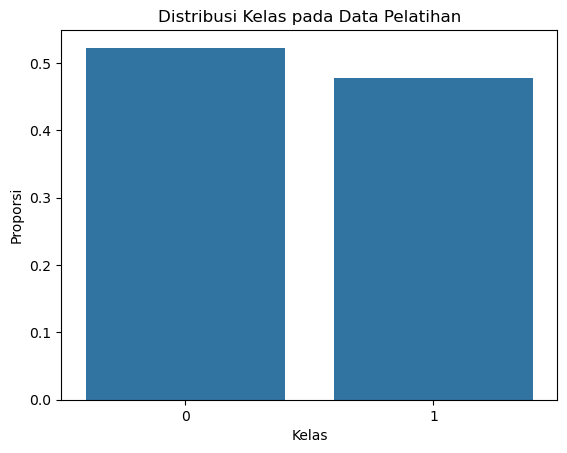

In [50]:
# Memeriksa distribusi kelas pada target variabel
import matplotlib.pyplot as plt
import seaborn as sns

class_distribution = y_train.value_counts(normalize=True)
print("Distribusi kelas dalam data pelatihan:")
print(class_distribution)

# Visualisasi distribusi kelas
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title("Distribusi Kelas pada Data Pelatihan")
plt.xlabel("Kelas")
plt.ylabel("Proporsi")
plt.show()


Distribusi yang Diberikan:
Kelas 0: 52.24% (Nasabah yang tidak membuka term deposit).
Kelas 1: 47.76% (Nasabah yang membuka term deposit).
Secara umum, data dianggap tidak seimbang (imbalanced) jika salah satu kelas jauh lebih kecil dari yang lain, misalnya:

Proporsi kelas minoritas di bawah 20%-30%.
Contoh: 90%-10%, 80%-20%.
Dalam kasus ini, distribusi kelas cukup seimbang (52.24% vs 47.76%), dengan perbedaan hanya sekitar 5%.

# 6. Evaluasi Model

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Latih model XGBoost dengan parameter terbaik
best_xgb_model = xgb_grid.best_estimator_
best_xgb_model.fit(X_train, y_train)

# Prediksi pada data pengujian
y_pred_xgb = best_xgb_model.predict(X_test)
y_pred_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# Evaluasi XGBoost
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)
xgb_roc_auc = roc_auc_score(y_test, y_pred_proba_xgb)

# Hasil evaluasi XGBoost
xgb_evaluation = {
    'Accuracy': xgb_accuracy,
    'Precision': xgb_precision,
    'Recall': xgb_recall,
    'F1-Score': xgb_f1,
    'ROC-AUC': xgb_roc_auc
}

xgb_evaluation


{'Accuracy': 0.7332053742802304,
 'Precision': 0.7740863787375415,
 'Recall': 0.6238286479250335,
 'F1-Score': 0.6908821349147516,
 'ROC-AUC': 0.7893174003202352}

Hasil Evaluasi XGBoost pada Data Pengujian
1.  Accuracy: 73.32%
    Model mampu mengklasifikasikan sekitar 73% sampel dengan benar.
2.  Precision: 77.41%
    Dari semua prediksi positif (yes), sekitar 77% benar-benar positif.
    Interpretasi: Model cukup efektif dalam meminimalkan false positives.
3.  Recall: 62.38%
    Dari semua kasus positif sebenarnya, model hanya berhasil menangkap sekitar 62%.
    Interpretasi: Model masih kehilangan beberapa prediksi positif (false negatives).
4.  F1-Score: 69.09%
    Kombinasi harmonis antara precision dan recall.
    Interpretasi: Model memiliki keseimbangan yang baik dalam memprediksi positif dengan tingkat kesalahan yang dapat diterima.
5.  ROC-AUC: 78.93%
    Kemampuan model untuk memisahkan kelas yes dan no secara keseluruhan.
    Interpretasi: Model cukup baik dalam membedakan antara dua kelas.

Kesimpulan untuk XGBoost
Keunggulan:
    Akurasi dan precision tinggi menunjukkan bahwa model efektif dalam memprediksi kelas positif tanpa terlalu banyak kesalahan.
Kelemahan:
    Recall yang relatif lebih rendah menunjukkan bahwa model kehilangan beberapa kasus positif.   

Evaluasi untuk Random Forest untuk Alternatif model terbaik

In [ ]:
# Latih model Random Forest dengan parameter terbaik
best_rf_model = rf_grid.best_estimator_
best_rf_model.fit(X_train, y_train)

# Prediksi pada data pengujian
y_pred_rf = best_rf_model.predict(X_test)
y_pred_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Evaluasi Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_pred_proba_rf)

# Hasil evaluasi Random Forest
rf_evaluation = {
    'Accuracy': rf_accuracy,
    'Precision': rf_precision,
    'Recall': rf_recall,
    'F1-Score': rf_f1,
    'ROC-AUC': rf_roc_auc
}

rf_evaluation


{'Accuracy': 0.7242482405630198,
 'Precision': 0.7476489028213166,
 'Recall': 0.6385542168674698,
 'F1-Score': 0.6888086642599277,
 'ROC-AUC': 0.7815772895503583}

Hasil Evaluasi Random Forest pada Data Pengujian
1.  Accuracy: 72.42%
    Sedikit lebih rendah dibandingkan XGBoost (73.32%), tetapi masih cukup kompetitif.
2.  Precision: 74.76%
    Hampir setara dengan XGBoost (77.41%).
    Interpretasi: Random Forest juga efektif dalam meminimalkan false positives.
3.  Recall: 63.86%
    Lebih tinggi dibandingkan XGBoost (62.38%).
    Interpretasi: Random Forest sedikit lebih baik dalam menangkap kasus positif.
4.  F1-Score: 68.88%
    Hampir sama dengan XGBoost (69.09%), menunjukkan keseimbangan antara precision dan recall yang serupa.
5.  ROC-AUC: 78.16%
    Sedikit lebih rendah dari XGBoost (78.93%), tetapi tetap menunjukkan kemampuan model untuk membedakan kelas yang cukup baik.

Perbandingan Antara XGBoost dan Random Forest
Metric      	XGBoost 	Random Forest
Accuracy	    73.32%	    72.42%
Precision	    77.41%	    74.76%
Recall	        62.38%	    63.86%
F1-Score	    69.09%	    68.88%
ROC-AUC	        78.93%	    78.16%    

Kesimpulan
    XGBoost sedikit lebih unggul dalam hal akurasi, precision, dan ROC-AUC.
    Random Forest lebih baik dalam recall, yang berarti lebih baik dalam menangkap kasus positif.
Rekomendasi:
    Gunakan XGBoost jika fokus pada akurasi keseluruhan dan minimalkan false positives.
    Gunakan Random Forest jika prioritas adalah meminimalkan false negatives (menangkap sebanyak mungkin kasus positif).

In [ ]:
Analisa Fitur yang penting dari kedua model yang diuji

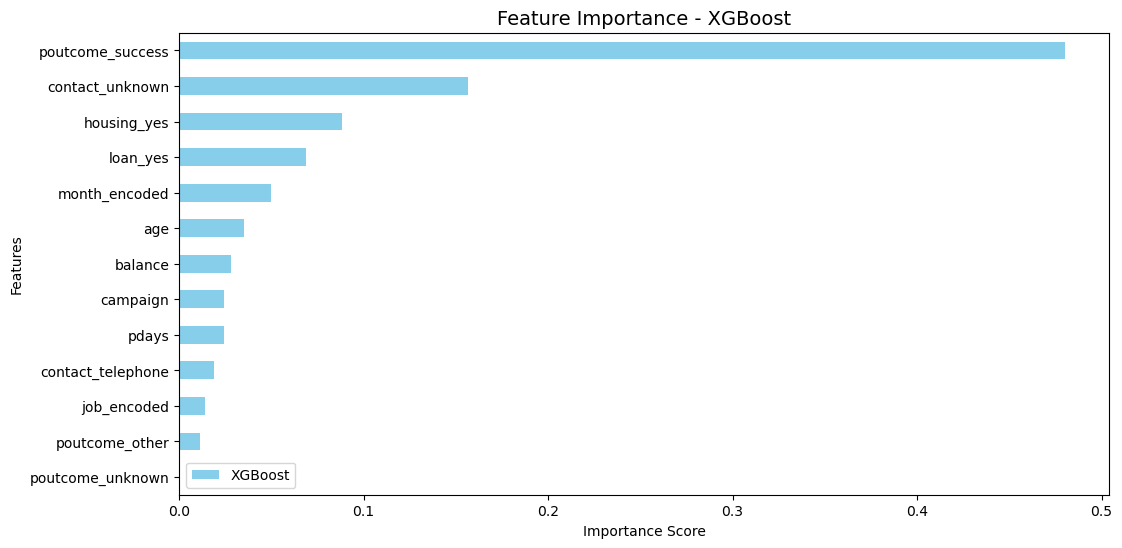

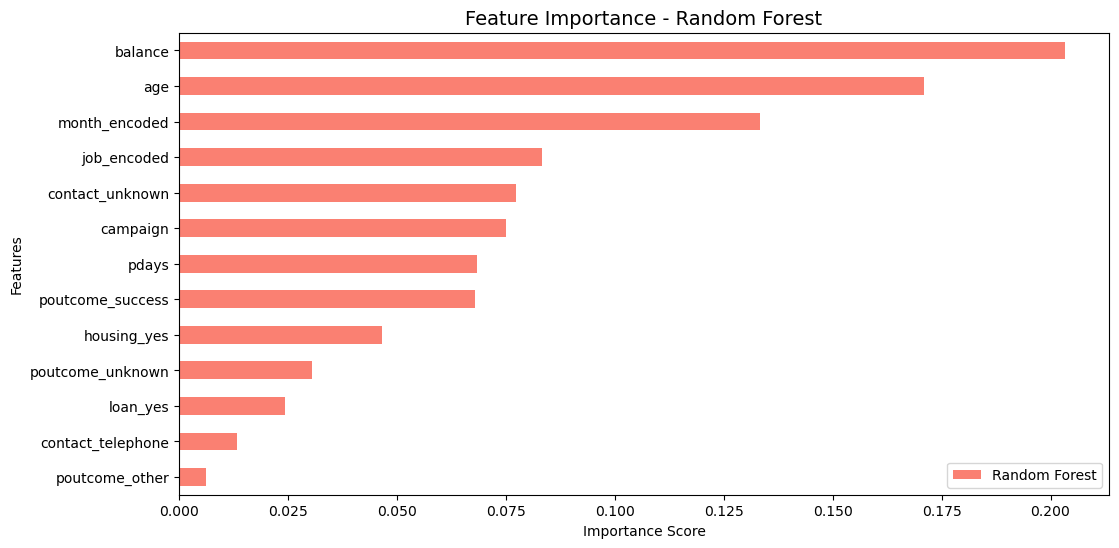

(poutcome_success     0.480074
 contact_unknown      0.156861
 housing_yes          0.088597
 loan_yes             0.068578
 month_encoded        0.049912
 age                  0.035100
 balance              0.028243
 campaign             0.024387
 pdays                0.024269
 contact_telephone    0.018780
 job_encoded          0.013860
 poutcome_other       0.011339
 poutcome_unknown     0.000000
 dtype: float32,
 balance              0.203265
 age                  0.170867
 month_encoded        0.133291
 job_encoded          0.083193
 contact_unknown      0.077270
 campaign             0.075026
 pdays                0.068284
 poutcome_success     0.067962
 housing_yes          0.046494
 poutcome_unknown     0.030502
 loan_yes             0.024409
 contact_telephone    0.013321
 poutcome_other       0.006115
 dtype: float64)

In [ ]:
# Feature Importance - XGBoost
xgb_feature_importance = pd.Series(best_xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Feature Importance - Random Forest
rf_feature_importance = pd.Series(best_rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plotting feature importance for both models
plt.figure(figsize=(12, 6))
xgb_feature_importance.sort_values().plot(kind='barh', color='skyblue', label='XGBoost')
plt.title("Feature Importance - XGBoost", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
rf_feature_importance.sort_values().plot(kind='barh', color='salmon', label='Random Forest')
plt.title("Feature Importance - Random Forest", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.legend()
plt.show()

xgb_feature_importance, rf_feature_importance


Analisis Feature Importance dari XGBoost dan Random Forest
1.  Feature Importance - XGBoost
    Fitur Paling Penting:
        poutcome_success (48.01%): Hasil sukses dari kampanye sebelumnya adalah faktor paling dominan dalam memprediksi apakah nasabah akan membuka term deposit.
        contact_unknown (15.69%): Nasabah dengan jenis kontak yang tidak diketahui juga menjadi indikator signifikan.
        housing_yes (8.86%): Status kepemilikan rumah memengaruhi keputusan nasabah.
    Fitur Kurang Penting:
        poutcome_unknown (0.00%): Tidak memberikan kontribusi signifikan dalam model ini.
2. Feature Importance - Random Forest
    Fitur Paling Penting:
        balance (20.33%): Saldo rekening menjadi fitur terpenting untuk model ini.
        age (17.09%): Usia nasabah juga menjadi faktor signifikan.
        month_encoded (13.33%): Bulan terakhir kontak dengan nasabah memberikan pengaruh besar.
    Fitur Kurang Penting:
        poutcome_other (0.61%): Kontribusi rendah terhadap prediksi.

Perbandingan Antara XGBoost dan Random Forest
Feature	            XGBoost Importance	Random Forest Importance
poutcome_success	48.01%	            6.79%
contact_unknown	    15.69%	            7.73%
housing_yes     	8.86%	            4.65%
balance	            2.82%	            20.33%
age	                3.51%           	17.09%
month_encoded	    4.99%           	13.33%

XGBoost:
    Lebih mengutamakan informasi kampanye sebelumnya (poutcome_success) sebagai prediktor utama.
    Cenderung memprioritaskan fitur yang langsung terkait dengan kampanye pemasaran.
Random Forest:
    Lebih memprioritaskan informasi demografi dan saldo keuangan (balance, age).
    Memberikan fokus lebih pada karakteristik nasabah daripada hasil kampanye sebelumnya.
Kesimpulan
    XGBoost lebih cocok jika Anda ingin memanfaatkan informasi historis kampanye untuk memprediksi konversi.
    Random Forest lebih baik jika Anda ingin memahami pengaruh karakteristik nasabah, seperti saldo dan usia.

    

# 7. Interpretasi Model

Penjelasan Perbedaan Pentingnya Fitur di Antara Model
1. Model XGBoost
    XGBoost menggunakan teknik boosting, di mana pohon-pohon keputusan dibangun secara bertahap untuk memperbaiki kesalahan prediksi dari pohon sebelumnya. Oleh karena itu, model ini lebih sensitif terhadap pola-pola dalam data yang mungkin tidak terdeteksi oleh model lain.
Fitur Utama:
poutcome_success (48.01%):
    Penjelasan: Hasil sukses dari kampanye sebelumnya adalah indikator kuat apakah nasabah cenderung membuka term deposit.
    Kenapa penting?: XGBoost mengenali pola bahwa nasabah yang sudah sukses dihubungi sebelumnya lebih mungkin untuk berlangganan.
contact_unknown (15.69%):
    Penjelasan: Jika jenis kontak tidak diketahui, ini menjadi indikator signifikan dalam model ini.
    Kenapa penting?: Fitur ini mungkin terkait dengan pola historis data kampanye.
    Fitur lainnya (housing_yes, month_encoded, dll.) juga berkontribusi tetapi dengan bobot yang lebih rendah.
Ciri Khas:
    Lebih fokus pada fitur yang secara langsung terkait dengan kampanye pemasaran (misalnya, hasil kampanye sebelumnya).
    Menggunakan informasi eksplisit dari pola-pola masa lalu untuk memaksimalkan prediksi.

2. Model Random Forest
Random Forest adalah model ensemble berbasis pohon keputusan, di mana banyak pohon dibangun secara acak, dan hasil akhir adalah rata-rata prediksi. Model ini lebih robust terhadap overfitting dan sering memprioritaskan fitur-fitur yang relevan secara langsung dengan target.
Fitur Utama:
balance (20.33%):
    Penjelasan: Saldo rekening nasabah menjadi faktor utama dalam memprediksi kemungkinan membuka term deposit.
    Kenapa penting?: Saldo yang tinggi menunjukkan kapasitas finansial nasabah untuk melakukan investasi.
age (17.09%):
    Penjelasan: Usia nasabah menjadi indikator signifikan dalam model ini.
    Kenapa penting?: Nasabah yang lebih tua cenderung memiliki stabilitas keuangan yang lebih baik.
month_encoded (13.33%):
    Penjelasan: Bulan terakhir kontak juga memainkan peran penting.
    Kenapa penting?: Waktu kampanye dapat memengaruhi keberhasilan.
Ciri Khas:
    Lebih fokus pada karakteristik demografi dan keuangan nasabah (seperti balance dan age).
    Memberikan bobot yang lebih merata pada fitur dibandingkan dengan XGBoost. 

Kesimpulan
XGBoost:
    Cocok jika ingin memahami bagaimana informasi historis kampanye memengaruhi keputusan nasabah.
    Lebih fokus pada pola eksplisit yang muncul dari data kampanye sebelumnya.
Random Forest:
    Cocok jika ingin memahami bagaimana karakteristik nasabah seperti saldo dan usia memengaruhi hasil prediksi.
    Lebih fokus pada hubungan langsung antara fitur demografi dan target.
Perbedaan ini dapat membantu memilih model berdasarkan prioritas bisnis, misalnya:
    Jika fokus pada strategi kampanye: XGBoost lebih relevan.
    Jika fokus pada karakteristik nasabah: Random Forest lebih informatif.

KesimpulanRingkasan Perbedaan Pentingnya Fitur
Metode Algoritma:

XGBoost:
    Menggunakan boosting, fokus pada memperbaiki kesalahan prediksi.
    Memberi bobot lebih besar pada fitur yang relevan untuk kesalahan awal, seperti poutcome_success.
Random Forest:
    Menggunakan bagging, membangun banyak pohon secara independen.
    Memberi bobot pada fitur yang secara langsung mengurangi ketidakpastian, seperti balance dan age.
Tipe Hubungan Fitur:
XGBoost:
    Menangkap hubungan non-linear dan pola kompleks antar fitur.
Random Forest:
    Fokus pada hubungan linier sederhana atau kontribusi langsung.
Pengukuran Pentingnya Fitur:
XGBoost:
    Mengukur kontribusi berdasarkan perbaikan kesalahan prediksi.
Random Forest:
    Mengukur kontribusi berdasarkan pengurangan impurity di pohon.
Contoh Fitur Penting:
    XGBoost: poutcome_success (informasi kampanye sebelumnya).
    Random Forest: balance dan age (karakteristik nasabah).
Kesimpulan:
    XGBoost cocok untuk pola kampanye historis.
    Random Forest cocok untuk analisis karakteristik nasabah.

Uji Coba Prediksi Sebelum Data Faktual untuk kedua Model

In [74]:
import pandas as pd
actual_data = pd.read_csv("D:/Capstone 3/data_bank_marketing_campaign.csv")

# Preprocessing ulang untuk memastikan semua kolom valid
def preprocess_actual_data(actual_data):
    # One-Hot Encoding untuk kolom kategorikal
    actual_data_encoded = pd.get_dummies(actual_data, columns=['housing', 'loan', 'contact', 'poutcome'], drop_first=True)

    # Encoding manual untuk kolom 'job' dan 'month'
    actual_data_encoded['job_encoded'] = actual_data['job'].map(job_frequency)
    actual_data_encoded['month_encoded'] = actual_data['month'].map(month_frequency)

    # Drop kolom yang telah diencode atau tidak relevan
    actual_data_encoded.drop(['job', 'month', 'deposit'], axis=1, errors='ignore', inplace=True)

    # Pastikan semua tipe data numerik
    actual_data_encoded = actual_data_encoded.astype(float)
    return actual_data_encoded

# Preprocessing data aktual
actual_data_cleaned = preprocess_actual_data(actual_data)

# Prediksi untuk XGBoost
xgb_predictions = best_xgb_model.predict(actual_data_cleaned)
actual_data['XGBoost_Prediction'] = xgb_predictions

# Prediksi untuk Random Forest
rf_predictions = best_rf_model.predict(actual_data_cleaned)
actual_data['RandomForest_Prediction'] = rf_predictions

# Simpan hasil ke Excel
output_path = "D:/Capstone 3/hasil_uji_faktual_data_bank_marketing_campaign_output.csv"
actual_data.to_csv(output_path, index=False)
print(f"Predictions saved to {output_path}")




Predictions saved to D:/Capstone 3/hasil_uji_faktual_data_bank_marketing_campaign_output.csv


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
[19:07:55] WARNING: D:\bld\xgboost-split_1713397727666\work\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


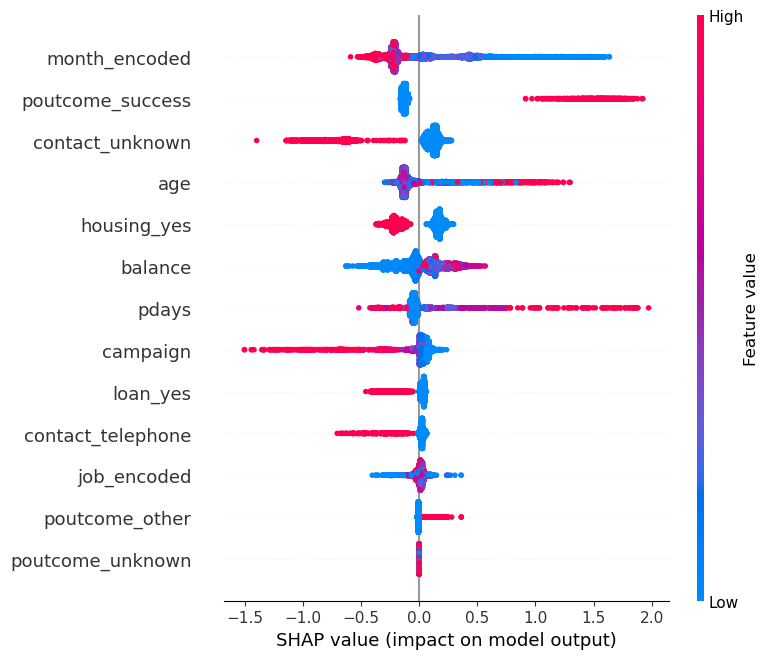

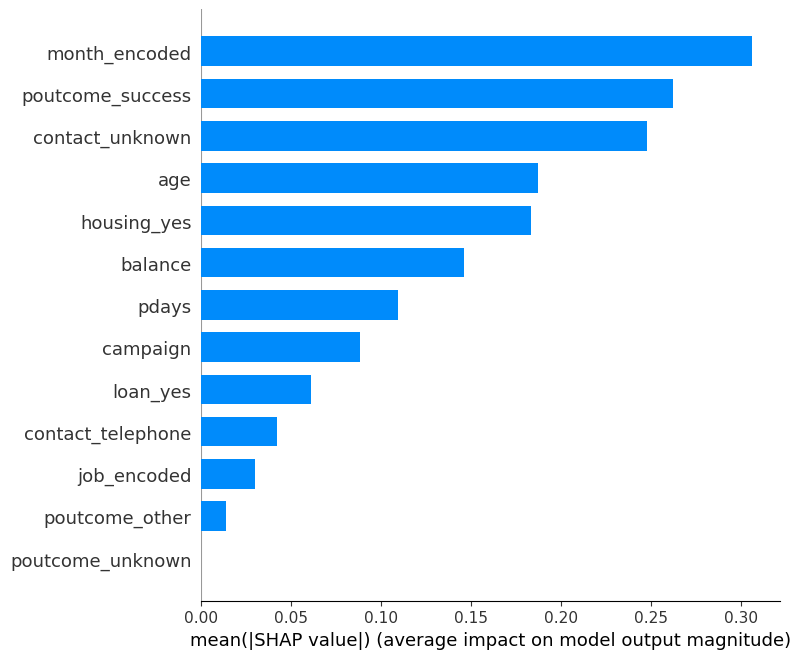

In [48]:
import shap

# Membuat objek SHAP explainer untuk model XGBoost
explainer = shap.Explainer(xgb_model_best, X_train)
shap_values = explainer(X_train)

# Plot summary untuk pengaruh fitur
shap.summary_plot(shap_values, X_train)

# Plot bar untuk ranking fitur berdasarkan pengaruh
shap.summary_plot(shap_values, X_train, plot_type="bar")


beradasarkan kesimpulan untuk menyesuaikan dengan konteks Marketing Bank Campaign maka yang dipilih model adalah Model XGBoost

# 8 Deployment Model

In [47]:
import pickle

# Menyimpan model XGBoost terbaik ke dalam file pickle
xgb_model_best = xgb_grid.best_estimator_

# Nama file untuk menyimpan model
pickle_filename = "xgboost_model.pkl"

# Menyimpan model
with open(pickle_filename, 'wb') as file:
    pickle.dump(xgb_model_best, file)

# Memberikan konfirmasi
pickle_filename


'xgboost_model.pkl'

Uji Coba Dengan Data Sample

In [73]:
import pandas as pd
import pickle

# Load data actual
actual_data = pd.read_csv("D:/Capstone 3/sample.csv")

# Preprocessing ulang untuk memastikan semua kolom valid
def preprocess_actual_data(actual_data):
    # One-Hot Encoding untuk kolom kategorikal
    actual_data_encoded = pd.get_dummies(actual_data, columns=['housing', 'loan', 'contact', 'poutcome'], drop_first=True)

    # Encoding manual untuk kolom 'job' dan 'month'
    actual_data_encoded['job_encoded'] = actual_data['job'].map(job_frequency)
    actual_data_encoded['month_encoded'] = actual_data['month'].map(month_frequency)

    # Drop kolom yang telah diencode atau tidak relevan
    actual_data_encoded.drop(['job', 'month', 'deposit'], axis=1, errors='ignore', inplace=True)

    # Perbaikan nama kolom jika ada kesalahan (contoh: typo)
    if 'poutcome_sucess' in actual_data_encoded.columns:
        actual_data_encoded.rename(columns={'poutcome_sucess': 'poutcome_success'}, inplace=True)

    # Hapus kolom duplikat
    actual_data_encoded = actual_data_encoded.loc[:, ~actual_data_encoded.columns.duplicated()]

    # Pastikan semua tipe data numerik
    actual_data_encoded = actual_data_encoded.astype(float)

    # Menyesuaikan urutan kolom dengan data pelatihan
    required_columns = [
        'age', 'balance', 'campaign', 'pdays', 'housing_yes', 'loan_yes',
        'contact_telephone', 'contact_unknown', 'poutcome_other',
        'poutcome_success', 'poutcome_unknown', 'job_encoded', 'month_encoded'
    ]
    for col in required_columns:
        if col not in actual_data_encoded.columns:
            actual_data_encoded[col] = 0  # Tambahkan kolom yang hilang dengan nilai default (misalnya, 0)
    actual_data_encoded = actual_data_encoded[required_columns]  # Pastikan urutan kolom sesuai

    return actual_data_encoded

# Preprocessing data aktual
actual_data_cleaned = preprocess_actual_data(actual_data)

# Load deployed model (XGBoost)
with open("xgboost_model.pkl", "rb") as file:
    deployed_model = pickle.load(file)

# Prediksi untuk XGBoost
xgb_predictions = deployed_model.predict(actual_data_cleaned)

# Tambahkan prediksi ke data aktual
actual_data['XGBoost_Prediction'] = xgb_predictions

# Simpan hasil ke CSV
output_path = "D:/Capstone 3/_hasil_sample_faktual_hasil_deploy_xgboost.csv"
actual_data.to_csv(output_path, index=False)

print(f"Predictions saved to {output_path}")


Predictions saved to D:/Capstone 3/_hasil_sample_faktual_hasil_deploy_xgboost.csv
